In [1]:
import pandas as pd
import statsrat as sr
from statsrat.expr.predef.pvl_time_cue import latent_inhib, extinction
from statsrat.expr.predef.pvl_iti import latent_inhib as latent_inhib_ntc
from exemplar_models import *
from plotnine import *

In [2]:
save_plots = True
model = null
print(model.pars)

# Simulations confirm that we also get latent inhibition without a time cue.

par_vals = {'null': [2.0, 1.0, 5.0]}

            min   max  default
decay_rate  0.0  10.0      0.5
nu          0.0  10.0      0.0
resp_scale  0.0  10.0      1.0


latent inhibition (no time cue) 

0.12533660590994877
       schedule     trial_name u_name  mean_resp
0       control  cs -> nothing     us   0.916599
0  experimental  cs -> nothing     us   0.791262


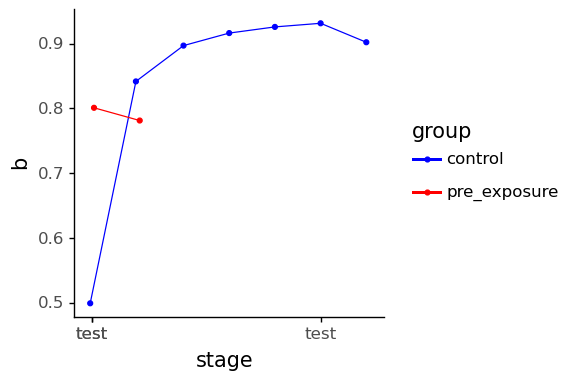

In [3]:
print('latent inhibition (no time cue) \n')

trials = latent_inhib_ntc.make_trials('experimental')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0

ds_exp = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = latent_inhib_ntc.make_trials('control')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
ds_ctl = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

plot_b = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       rename_schedules = {'control': 'control', 'experimental': 'pre_exposure'},
                       only_main = True,
                       draw_points = True,
                       sel = [{'t': ds_exp['stage_name'].isin(['cond', 'test'])}, None])
plot_b += scale_color_manual(values = {'pre_exposure': 'red', 'control': 'blue'})
plot_b.draw()

print(latent_inhib_ntc.oats['latent_inhibition'].compute_total({'experimental': ds_exp, 'control': ds_ctl}))
print(latent_inhib_ntc.oats['latent_inhibition'].mean_resp({'experimental': ds_exp, 'control': ds_ctl}))

latent inhibition (time cue, negligible attention to time) 



/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_latent_inhib_b_null.jpeg
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_latent_inhib_r_null.jpeg


0.11857314000546848
       schedule     trial_name u_name  mean_resp
0       control  cs -> nothing     us   0.869849
0  experimental  cs -> nothing     us   0.751276


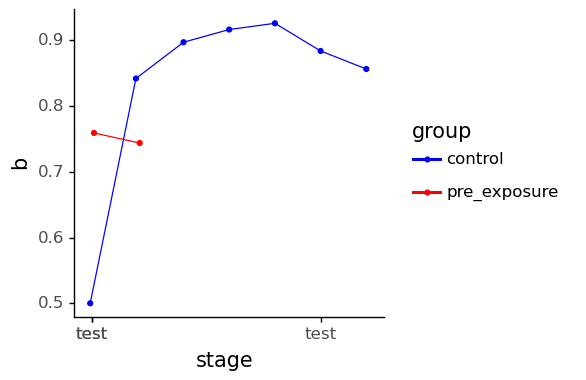

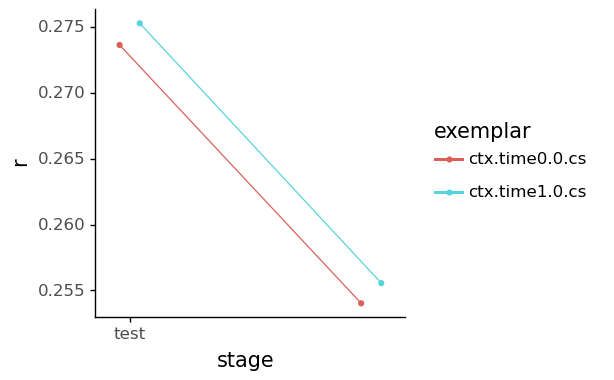

In [4]:
print('latent inhibition (time cue, negligible attention to time) \n')

trials = latent_inhib.make_trials('experimental')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
ds_exp = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = latent_inhib.make_trials('control')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
ds_ctl = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

plot_b = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       rename_schedules = {'control': 'control', 'experimental': 'pre_exposure'},
                       only_main = True,
                       draw_points = True,
                       sel = [{'t': ds_exp['stage_name'].isin(['cond', 'test'])}, None])
plot_b += scale_color_manual(values = {'pre_exposure': 'red', 'control': 'blue'})
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/exemplar_latent_inhib_b_' + model.name + '.jpeg', dpi = 500)
    
plot_r = sr.learn_plot(ds_exp,
                       var = 'rtrv',
                       rename_coords = {'ex_name': 'exemplar'},
                       only_main = True,
                       draw_points = True,
                       sel = {'t': ds_exp['stage_name'] == 'test', 'ex_name': ['ctx.time0.0.cs', 'ctx.time1.0.cs']})
plot_r += ylab('r')
plot_r.draw()
if save_plots:
    plot_r.save(filename = 'plots/exemplar_latent_inhib_r_' + model.name + '.jpeg', dpi = 500)

print(latent_inhib.oats['latent_inhibition'].compute_total({'experimental': ds_exp, 'control': ds_ctl}))
print(latent_inhib.oats['latent_inhibition'].mean_resp({'experimental': ds_exp, 'control': ds_ctl}))

latent inhibition vs. extinction (time cue, selective attention) 



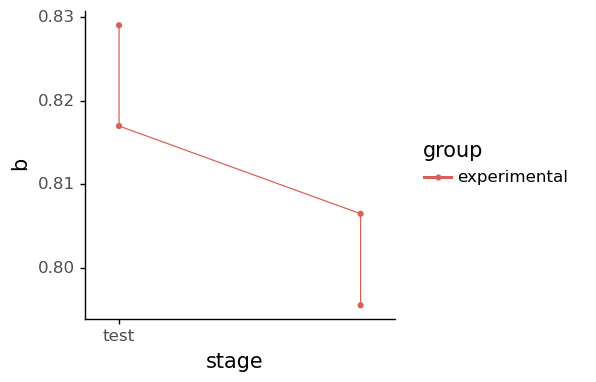

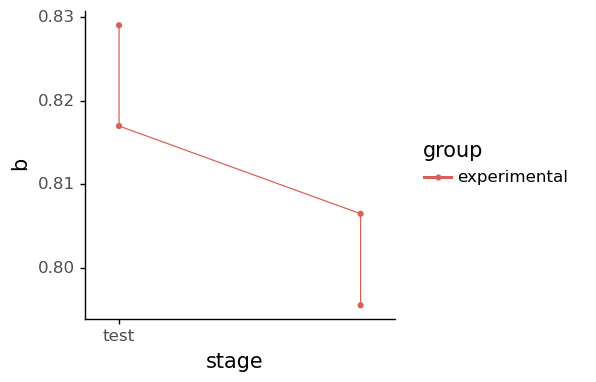

In [5]:
print('latent inhibition vs. extinction (time cue, selective attention) \n')
# FIX THE SCHEDULE NAMES

trials = latent_inhib.make_trials('experimental')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
init_atn.loc['ctx.time0.0.cs', 'time'] = 1.0
ds_li = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = extinction.make_trials('experimental')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
init_atn.loc['ctx.time1.0.cs', 'time'] = 1.0
ds_ex = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

plot_b = sr.multi_plot(ds_list = [ds_li, ds_ex],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       only_main = True,
                       draw_points = True,
                       sel = [{'t': ds_li['stage_name'].isin(['cond', 'test'])}, {'t': ds_ex['stage_name'].isin(['cond', 'test'])}])
plot_b.draw()

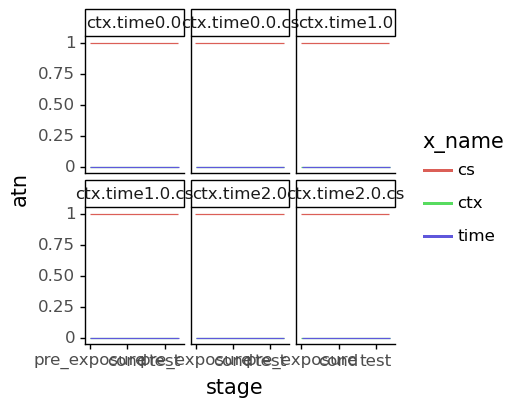

In [6]:
if model.name == 'grad_common':
    sr.learn_plot(ds_exp, var = 'atn', color_var = 'x_name', sel = {'ex_name': ds_exp['ex_name'].values[0]}).draw()
else:
    sr.learn_plot(ds_exp, var = 'atn', color_var = 'x_name', facet_var = 'ex_name').draw()

In [7]:
print(ds_exp)

<xarray.Dataset>
Dimensions:     (ex_name: 6, ident: 1, t: 72, u_name: 1, x_name: 3)
Coordinates:
  * t           (t) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70 71
    t_name      (t) <U8 'bg' 'bg' 'bg' 'bg' ... 'bg' 'bg' 'pre_main' 'main'
    ex          (t) <U14 'ctx.time0.0' 'ctx.time0.0' ... 'ctx.time2.0.cs'
    trial       (t) int64 0 0 0 0 0 0 1 1 1 1 ... 10 10 10 10 11 11 11 11 11 11
    trial_name  (t) <U13 'cs -> nothing' 'cs -> nothing' ... 'cs -> nothing'
    stage       (t) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2 2 2 2 2
    stage_name  (t) <U12 'pre_exposure' 'pre_exposure' ... 'test' 'test'
  * x_name      (x_name) <U4 'cs' 'ctx' 'time'
  * u_name      (u_name) <U2 'us'
    time        (t) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70 71
  * ex_name     (ex_name) <U14 'ctx.time0.0' 'ctx.time1.0' ... 'ctx.time2.0.cs'
  * ident       (ident) <U3 'sim'
Data variables:
    x           (t, x_name) float64 0.0 1.0 0.0 0.0 1.0 ... 1.0 2.0 1.0